# Exercise 6

## Predict rating using LSTM


In [1]:
import pandas as pd

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."
...,...
8417,""" our marriage , their wedding . "" it ' s l..."
1592,"the wandering barbarian , conan , alongside ..."
1723,"like a tale spun by scheherazade , kismet fol..."
7605,"mrs . brisby , a widowed mouse , lives in a..."


In [5]:
y

,rating
3107,1
900,0
6724,1
4704,1
2582,1
...,...
8417,0
1592,0
1723,0
7605,1


# Exercise 6.1

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [6]:
!pip install tensorflow

In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
nltk.download('stopwords')
nltk.download('punkt')


from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import random
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    # 2 Convertir todo el texto a minúsculas
    text = text.lower()

    # Eliminar puntuación del texto
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3 Tokenizar el texto
    tokens = word_tokenize(text)

    # 1 Eliminar las stopwords del texto tokenizado
    tokens = [word for word in tokens if word not in stop_words]

    # Unir las palabras restantes en una sola cadena de texto
    return ' '.join(tokens)

X = plots.apply(preprocess)
X = X.tolist()
# Crear vocabulario a partir de las palabras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convertir el texto en secuencias de enteros
X_seq = tokenizer.texts_to_sequences(X)
max_len = 150

# 4 pad_sequences
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Exercise 6.2

Create a SimpleRNN neural network to predict the rating of a movie

Calculate the testing set accuracy

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 48s 438ms/step - accuracy: 0.5230 - loss: 3.5874 - val_accuracy: 0.5807 - val_loss: 2.0239
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 68s 300ms/step - accuracy: 0.5632 - loss: 1.8793 - val_accuracy: 0.5573 - val_loss: 1.6118
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.5561 - loss: 1.5630 - val_accuracy: 0.5826 - val_loss: 1.4329
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - accuracy: 0.5675 - loss: 1.3944 - val_accuracy: 0.5877 - val_loss: 1.3049
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - accuracy: 0.5905 - loss: 1.2664 - val_accuracy: 0.5921 - val_loss: 1.2032
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - accuracy: 0.6737 - loss: 1.1361 - val_accuracy: 0.6048 - val_loss: 1.1350
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.8736 - loss: 0.9632 - val_accuracy: 0.6213 - val_loss: 1.0984
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.9616 - loss: 0.7331 - val_accuracy: 0.632

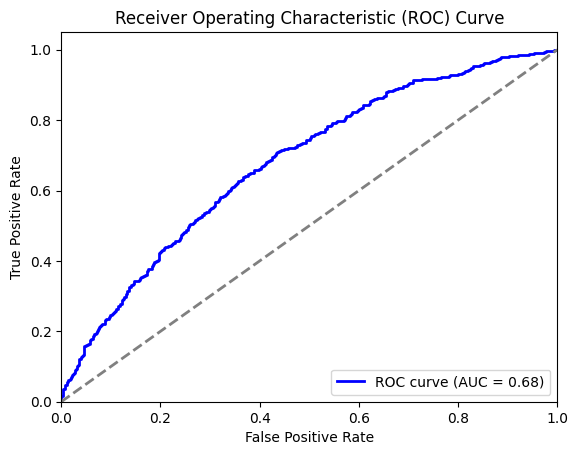

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal sencilla
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))

# Aplanar la salida para conectarla a la siguiente capa densa
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

y_pred_prob = model.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Exercise 6.3

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 53s 967ms/step - accuracy: 0.5122 - loss: 3.3703 - val_accuracy: 0.5694 - val_loss: 1.7316
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 80s 924ms/step - accuracy: 0.6183 - loss: 1.4447 - val_accuracy: 0.6049 - val_loss: 0.9522
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 933ms/step - accuracy: 0.8457 - loss: 0.6364 - val_accuracy: 0.6053 - val_loss: 0.9225
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 921ms/step - accuracy: 0.9222 - loss: 0.3135 - val_accuracy: 0.5914 - val_loss: 1.0649
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 932ms/step - accuracy: 0.9675 - loss: 0.1556 - val_accuracy: 0.6011 - val_loss: 1.4594
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 921ms/step - accuracy: 0.9815 - loss: 0.0959 - val_accuracy: 0.5889 - val_loss: 1.6100
Test accuracy: 0.6053187251091003
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step


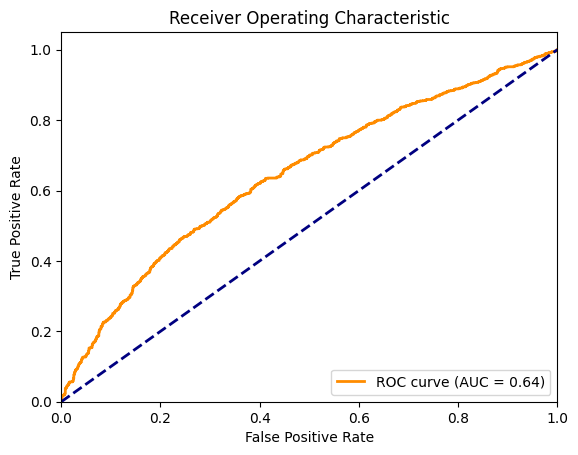

In [26]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional, GlobalMaxPooling1D


vocab_size = len(tokenizer.word_index) + 1

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Crear el modelo LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True,
                             kernel_regularizer=l2(0.01))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=128, epochs=20, verbose=1, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

y_pred_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Exercise 6.4

Create a GRU neural network to predict the rating of a movie

Calculate the testing set accuracy

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5245 - loss: 0.6945 - val_accuracy: 0.5285 - val_loss: 0.6931
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.5262 - loss: 0.6915 - val_accuracy: 0.5285 - val_loss: 0.6916
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5720 - loss: 0.6682 - val_accuracy: 0.6015 - val_loss: 0.6689
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8196 - loss: 0.4525 - val_accuracy: 0.5859 - val_loss: 0.8173
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9388 - loss: 0.2016 - val_accuracy: 0.5859 - val_loss: 1.1425
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9852 - loss: 0.0616 - val_accuracy: 0.5707 - val_loss: 1.4447
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.5992 - loss: 0.6637
Testing Accuracy: 60.15%
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step


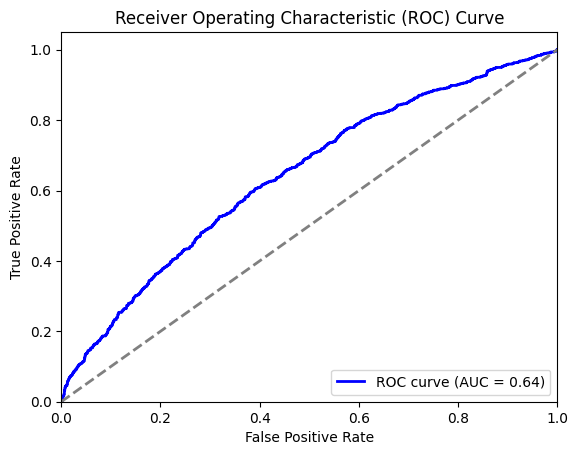

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200
gru_units = 256
dropout_rate = 0.4
batch_size = 64
epochs = 20

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Dividir los datos en conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42, stratify=y)

# Crear el modelo secuencial
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))

# Capas GRU
model.add(GRU(units=gru_units, return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(GRU(units=gru_units, return_sequences=False))
model.add(Dropout(dropout_rate))

model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {accuracy * 100:.2f}%')

y_pred_prob = model.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()